In [1]:
import numpy as np
import pandas as pd
import os
import sys

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

from matplotlib.animation import FuncAnimation
from matplotlib.ticker import FormatStrFormatter

plt.rcParams['animation.html'] = 'html5'
plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'

In [2]:
from matplotlib import gridspec

In [3]:
from matplotlib.lines import Line2D

In [4]:
fs=16
plt.rc("font",size=fs)

### params

In [5]:
outpath     = "/Volumes/Baby-Orange/XPIA-NCAR/processed/"

z_zi_target = 0.5

In [6]:
minf    = 1/30000.
maxf    = 1/333.
filterf = 1/(333.*5)

factors = [5, 10, 20, 50, 90]
xlabels = ["${0}\Delta_{{gz}}$".format(a) for a in factors]
xticks  = [1/(333*a) for a in factors]

In [7]:
keys_in_order = ["les","vles","mynn","ysu","sh"]

In [8]:
colors = { "les"   :"k",
          "les_raw":"k",
          "vles"   :"#808B96",
          "mynn"   :"#641E16",
          "ysu"    :"#A93226",
          "sh"     :"#D98880",}

lss    = { "les":"-",
          "les_raw":"-",
          "vles":"-",
          "mynn":"-.",
           "ysu":"--",
            "sh":":",}

lws =    { "les"   :2,
          "les_raw":4,
          "vles"   :2,
          "mynn"   :2,
          "ysu"    :2,
          "sh"     :2}

In [9]:
colors_days = {20:'#ABB2B9',
               21:'#5DADE2',
               28:'#16A085',
               29:'#D4AC0D',
               30:'#A569BD'}

In [10]:
cutoff_meters = 333*5.
cutoff_kappa  = np.sqrt((1/cutoff_meters)**2 + (1/cutoff_meters)**2)

### i/o

In [11]:
convective      = pd.read_csv(os.path.join(outpath,"datetimes_ziL_gt_25.csv"),header=None,index_col=[0])
convective_list = np.array([ pd.Timestamp(l[0]) for l in convective.values.tolist() ])
nt              = len(convective_list)
print(nt)

269


In [12]:
year    = 2015
month   = 3
days    = [20,21,28,29,30]#,21,28,29,30]
hours   = np.arange(14,24,1)
minutes = np.arange(0,60,10)

varname         = 'w'
df_snapshot_les = []
df_snapshot_gz  = []
datetimes       = []

prefix = "psd" if varname=="w" else "csd"

for day in days:
    for hour in hours:
        for minute in minutes:
            
            datetime = pd.Timestamp(year=year,month=month,day=day,hour=hour,minute=minute)
            
            #if datetime not in convective_list:
            #    print ("Skipping {0:%Y-%m-%d_%H-%M}".format(datetime))
            #    continue
            #else:
            fin                   = os.path.join(outpath,"{2}_azimuthal_mean_les_{0:%Y-%m-%d_%H-%M}_{1}.npz".format(datetime,varname,prefix))
            sys.stdout.write('\r'+fin)                            
            dfnow_les             = pd.read_csv(fin, index_col=[0])
            dfnow_les['datetime'] = datetime
            
            fin                   = os.path.join(outpath,"{2}_azimuthal_mean_gray_zone_{0:%Y-%m-%d_%H-%M}_{1}.npz".format(datetime,varname,prefix))
            sys.stdout.write('\r'+fin)                            
            dfnow_gz             = pd.read_csv(fin, index_col=[0])
            dfnow_gz['datetime'] = datetime            
            
            df_snapshot_les.append(dfnow_les)
            df_snapshot_gz.append(dfnow_gz)            
            datetimes.append(datetime)

/Volumes/Baby-Orange/XPIA-NCAR/processed/psd_azimuthal_mean_gray_zone_2015-03-30_23-50_w.npz

### organize into multi-index dataframe

In [13]:
df_les = pd.concat(df_snapshot_les)
df_les = df_les.reset_index().set_index(['datetime','index'])

print(df_les.head())
print(df_les.tail())

                                      les      les_raw
datetime            index                             
2015-03-20 14:00:00 0.000000     0.004168     0.327644
                    0.000047  1141.191810  1116.724613
                    0.000094   584.497166   605.326546
                    0.000141   264.586794   274.465119
                    0.000189   177.046138   195.402229
                                       les   les_raw
datetime            index                           
2015-03-30 23:50:00 0.028096  8.273497e-09  0.000135
                    0.028143  8.235600e-09  0.000134
                    0.028190  8.198318e-09  0.000123
                    0.028237  8.161775e-09  0.000129
                    0.028284  8.126093e-09  0.000126


In [14]:
df_gz = pd.concat(df_snapshot_gz)
df_gz = df_gz.reset_index().set_index(['datetime','index'])

print(df_gz.head())
print(df_gz.tail())

                                      sh        mynn        vles         ysu
datetime            index                                                   
2015-03-20 14:00:00 0.000000    1.141726    9.873464   24.474422    1.244771
                    0.000047  134.080946  244.849973  209.891330  136.178561
                    0.000094  234.137245  184.855522  150.117968  234.609800
                    0.000142  123.601271  170.580566  140.386191  123.297259
                    0.000189   99.254294   95.604179   77.066929   98.140226
                                    sh      mynn      vles       ysu
datetime            index                                           
2015-03-30 23:50:00 0.001935  0.181859  0.089130  0.245187  0.135653
                    0.001982  0.180174  0.088013  0.244798  0.135847
                    0.002029  0.171407  0.085966  0.233701  0.133930
                    0.002076  0.166768  0.084994  0.230938  0.133364
                    0.002123  0.163020  0.08310

# EXAMPLE PLOT, ONLY ONE TIME

In [15]:
datetimes = np.unique(df_gz.index.get_level_values(0))

In [16]:
factors_gz = [2, 20, 90]
xlabels_gz = ["${0}\Delta_{{GZ}}$".format(a) for a in factors_gz]
xticks_gz  = [1/(333*a) for a in factors_gz]

factors_les = [2, 10]
xlabels_les = ["${0}\Delta_{{LES}}$".format(a) for a in factors_les]
xticks_les  = [1/(25*a) for a in factors_les]

xticks_example = xticks_gz + xticks_les
xlabels_example = xlabels_gz + xlabels_les

In [37]:
meters = [30000, 5000, 1000, 250, 50]
xticks_example  = [1/a for a in meters]
xlabels_example = [r"$\frac{{1}}{{{0}~\mathrm{{km}}}}$".format(int(a/1000)) if a>=1000 else r"$\frac{{1}}{{{0}~\mathrm{{m}}}}$".format(int(a)) for a in meters ]

2015-03-21 20:00:00


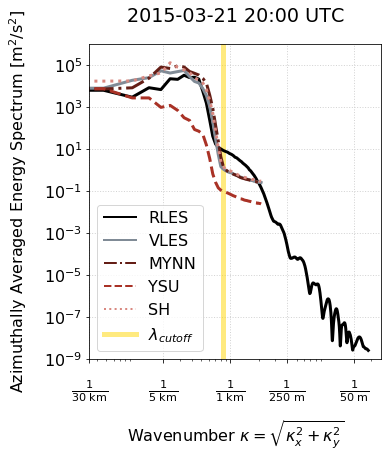

In [39]:
datetimes = np.unique(df_gz.index.get_level_values(0))
sims      = ['les','vles','mynn','ysu','sh']

fig = plt.figure(figsize=(7,6))
ax  = fig.add_subplot(111)
ax.grid(color='lightgray', linestyle=':', linewidth=1)

lines = {}

cutoffcolor = "gold"
ax.axvline(x=cutoff_kappa, color=cutoffcolor, linestyle='-', lw=5, alpha=0.5)

for datetime in datetimes[96:97]:

    print(pd.Timestamp(datetime))

    for sim in sims:
        
        df_to_use  = df_les if sim.lower() in ["les","les_raw"] else df_gz
        snapshot   = df_to_use.xs(datetime,level=0)
        simlab="RLES" if sim=="les" else sim
        lines[sim] = ax.loglog((snapshot.index), (snapshot[sim].values), lw=3, ls=lss[sim], color=colors[sim], label=simlab)[0]
    
#ax.set_xlabel("Wavelength $\lambda=\sqrt{\lambda_x^2+\lambda_y^2}$", labelpad=15)
ax.set_xlabel("Wavenumber $\kappa=\sqrt{\kappa_x^2+\kappa_y^2}$", labelpad=15)
ax.set_ylabel("Azimuthally Averaged Energy Spectrum [m$^2$/s$^2$]", labelpad=15)

ax.set_xticks((xticks_example))
ax.set_xticklabels(xlabels_example)

datetime = pd.Timestamp(datetime)
difference = datetime-pd.Timestamp(year=year,month=month,day=datetime.day,hour=14,minute=0)
difference_decimal = difference.total_seconds()/(10*60*60)
    
ax.set_title("{0:%Y-%m-%d %H:%M} UTC".format(pd.Timestamp(datetime)),y=1.05)

ax.set_ylim([1e-9,1e6])
# ax.set_xlim([minf,cutoff_kappa])
ax.tick_params(axis='x', which='major', pad=15)

fig.subplots_adjust(left=0.2,bottom=0.15,right=0.78)

ls     = []
labels = []
for sim in sims:
    ls.append(Line2D([0], [0], color=colors[sim], linewidth=2, ls=lss[sim], marker='None'))
    simlab="RLES" if sim=="les" else sim    
    labels.append(simlab.upper())
ls.append(Line2D([0], [0], color=cutoffcolor, linewidth=5, ls="-", marker='None', alpha=0.5))
labels.append("$\lambda_{{cutoff}}$")    
ax.legend(ls,labels,loc=3)#,bbox_to_anchor=(1,0.9),frameon=False,handlelength=0.4)
fig.savefig("../figs/example_spectrum_nolims_annotated.png", dpi=300, bbox_inches="tight")

# VIDEOS OF SNAPSHOTS OF SPECTRA

In [38]:
from matplotlib.colors import LinearSegmentedColormap

anchor_colors = ['lightskyblue' , 'khaki', 'coral' , 'orangered' , 'coral', 'khaki' , 'lightskyblue']
cmap_name = 'sunrise_noon_sunset'
cm = LinearSegmentedColormap.from_list(cmap_name, anchor_colors, N=100)

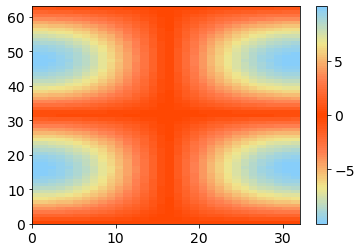

In [26]:
x = np.arange(0, np.pi, 0.1)
y = np.arange(0, 2 * np.pi, 0.1)
X, Y = np.meshgrid(x, y)
Z = np.cos(X) * np.sin(Y) * 10

plt.pcolormesh(Z, cmap=cm)
plt.colorbar()

In [27]:
sims_to_plot = ['les','vles','mynn','ysu','sh']

2015-03-20T14:00:00.000000000


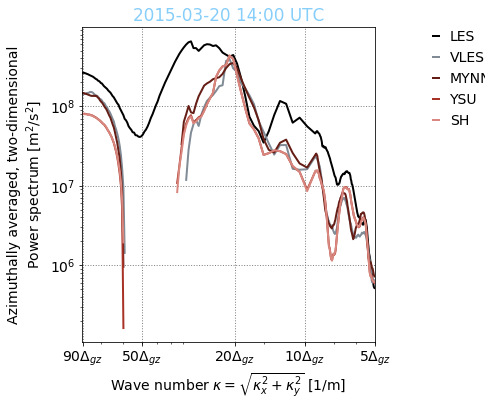

In [32]:
datetimes = np.unique(df_all.index.get_level_values(0))

fig = plt.figure(figsize=(7,6))
ax  = fig.add_subplot(111)
ax.grid(color='gray', linestyle=':', linewidth=1)

for datetime in datetimes[0:1]:
    print(datetime)
    snapshot = df_all.xs(datetime,level=0)
    idx = np.where((snapshot.index<=filterf)&(snapshot.index>=minf))
    lines = {}
    for sim in sims_to_plot:
        lw=6 if 'raw' in sim else 2
        lines[sim] = ax.loglog(snapshot.index[idx], snapshot[sim].values[idx], lw=lw, color=colors[sim], label=sim)[0]
        #texts = [ax.text(0.80, 0.95-i*0.05,  '', transform=ax.transAxes) for i in range(N)]
    
ax.set_xlabel("Wave number $\kappa=\sqrt{\kappa_x^2+\kappa_y^2}$ [1/m]")
ax.set_ylabel("Azimuthally averaged, two-dimensional\nPower spectrum [m$^2$/s$^2$]")
ax.set_xlim([minf,filterf])
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)

datetime = pd.Timestamp(datetime)
difference = datetime-pd.Timestamp(year=year,month=month,day=datetime.day,hour=14,minute=0)
difference_decimal = difference.total_seconds()/(10*60*60)
    
ax.set_title("{0:%Y-%m-%d %H:%M} UTC".format(pd.Timestamp(datetime)),color=cm(difference_decimal))

# ax.set_ylim([1e8,1e14])
fig.subplots_adjust(left=0.2,bottom=0.15,right=0.78)

ls     = []
labels = []
for sim in sims_to_plot:
    ls.append(Line2D([0], [0], color=colors[sim], linewidth=2, marker='None'))
    labels.append(sim.upper())
fig.legend(ls,labels,bbox_to_anchor=(1,0.9),frameon=False,handlelength=0.4)

In [439]:
def animate(i):
    
    datetime = datetimes[i]
    local_hour = (pd.Timestamp(datetime) - pd.Timedelta('6h')).hour
    snapshot = df_all.xs(datetime,level=0)

    for sim in sims_to_plot:
        lines[sim].set_data(snapshot.index[idx], snapshot[sim].values[idx])   
        lines[sim].set_label(sim)  
        
    datetime = pd.Timestamp(datetime)
    difference = datetime-pd.Timestamp(year=year,month=month,day=datetime.day,hour=14,minute=0)
    difference_decimal = difference.total_seconds()/(10*60*60)
        
    ax.set_title("{0:%Y-%m-%d %H:%M} UTC".format(pd.Timestamp(datetime)),color=cm(difference_decimal))

In [443]:
anim = FuncAnimation(fig, animate, interval=400, frames=np.arange(1,len(datetimes),1))

In [445]:
fout = "../figs/spectra_azimuthally_averaged_{0}_z_over_zi_{1}_day_{2}_no_raw.mp4".format(varname,z_zi_target,datetime.day)
anim.save(fout)

# analysis by day

In [16]:
subsets_by_day_les = {}
dayavg_by_day_les  = {}

subsets_by_day_gz = {}
dayavg_by_day_gz  = {}

df_les_convective = df_les.reset_index().set_index('datetime').loc[pd.DatetimeIndex(convective_list)].reset_index().set_index(['datetime','index'])
df_gz_convective  = df_gz.reset_index().set_index('datetime').loc[pd.DatetimeIndex(convective_list)].reset_index().set_index(['datetime','index'])

for day in np.unique(df_les.index.get_level_values(0).day):
    
    print(day)

    day1  = day
    day2  = day

    hour1 = 14
    hour2 = 23

    minute1 = 0
    minute2 = 59

    start = pd.Timestamp(year=year,month=month,day=day1,hour=hour1,minute=minute1)
    end   = pd.Timestamp(year=year,month=month,day=day2,hour=hour2,minute=minute2)

    # the two les first
    df_subset         = df_les_convective.reset_index().set_index('datetime').loc[start:end].reset_index().set_index(['datetime','index'])
    df_subset_timeavg = df_subset.median(level=1)
    
    subsets_by_day_les[day] = df_subset.copy()
    dayavg_by_day_les[day]  = df_subset_timeavg.copy()
    
    # the four gz second
    df_subset         = df_gz_convective.reset_index().set_index('datetime').loc[start:end].reset_index().set_index(['datetime','index'])
    df_subset_timeavg = df_subset.median(level=1)
    
    subsets_by_day_gz[day] = df_subset.copy()
    dayavg_by_day_gz[day]  = df_subset_timeavg.copy()    

20
21
28
29
30


### one figure per simulation strategy, with all 10-mins and all daily averages

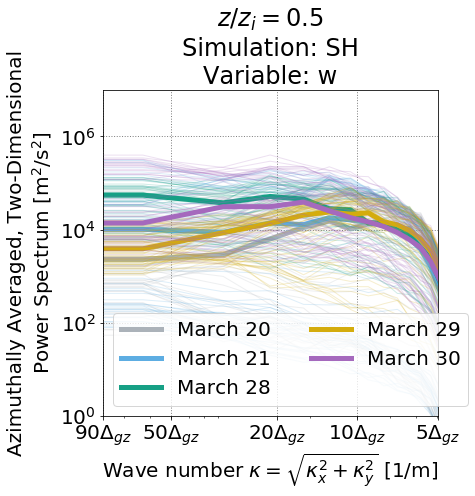

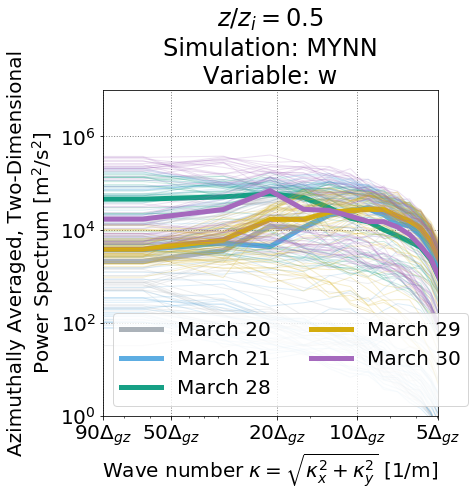

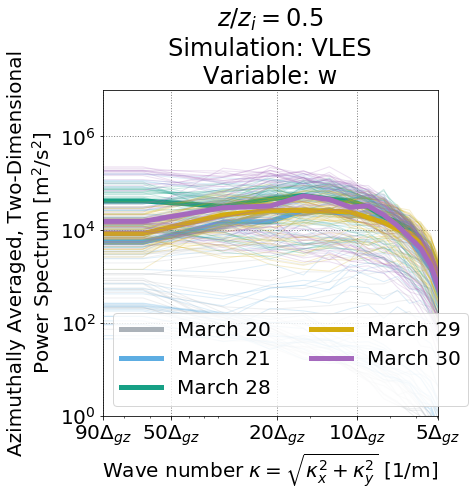

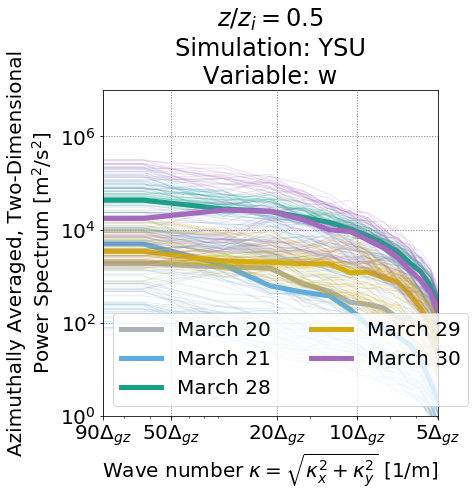

In [213]:
link_daily_avgs = dayavg_by_day_gz
link_snapshots  = subsets_by_day_gz

for sim in link_daily_avgs[day].columns:

    fig = plt.figure(figsize=(6,6))
    ax  = fig.add_subplot(111)
    ax.grid(color='gray', linestyle=':', linewidth=1)

    for day in link_daily_avgs.keys():
        
        df_subset = link_snapshots[day].copy()    
        for datetime in np.unique(df_subset.index.get_level_values(0)):
            snapshot = df_subset.xs(datetime,level=0)
            ax.loglog(snapshot.index, snapshot[sim].values, lw=1, color=colors_days[day],alpha=0.2)    
        ax.loglog(link_daily_avgs[day].index, link_daily_avgs[day][sim],lw=5,color=colors_days[day],label='March {0}'.format(day))        

    #,label=key.upper(),color=colors[key], linestyle=lss[key], linewidth=lws[key])

    ax.set_xlabel("Wave number $\kappa=\sqrt{\kappa_x^2+\kappa_y^2}$ [1/m]")
    ax.set_ylabel("Azimuthally Averaged, Two-Dimensional\nPower Spectrum [m$^2$/s$^2$]")
    
    ax.set_ylim([1e0,1e7])
    ax.set_xlim([minf,filterf])

    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels)

    ax.set_title("$z/z_i={0}$".format(z_zi_target)+"\nSimulation: {0}".format(sim.upper())+"\nVariable: {0}".format(varname))
    plt.legend(loc=3,ncol=2)

    fig.savefig("../figs/{0}_spectra_{1}_yeslim.png".format(varname,sim), dpi=200, bbox_inches="tight")

### one figure per simulation strategy, with a panel per day showing all 10-mins and the daily average

In [ ]:
meters = [2000,4000,8000,16000,30000]
xticks_example  = [1/a for a in meters]
xlabels_example = ["{0}".format(int(a/1000)) for a in meters ]

In [ ]:
fs=20
plt.rc("font",size=fs)

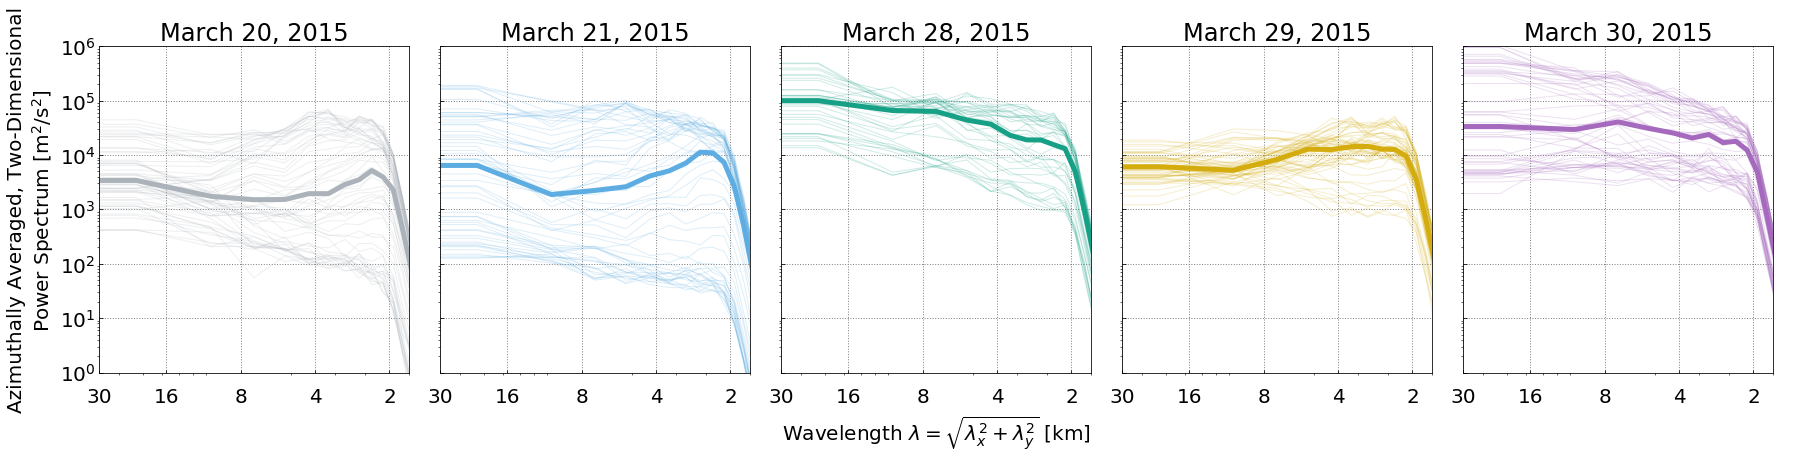

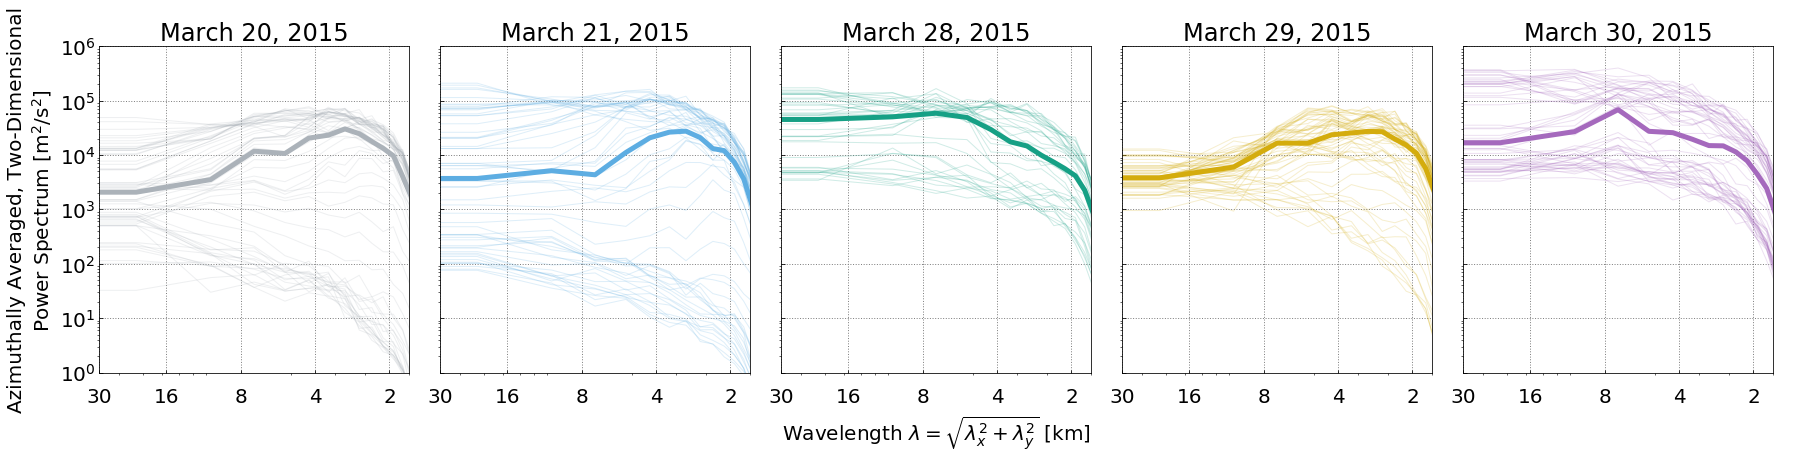

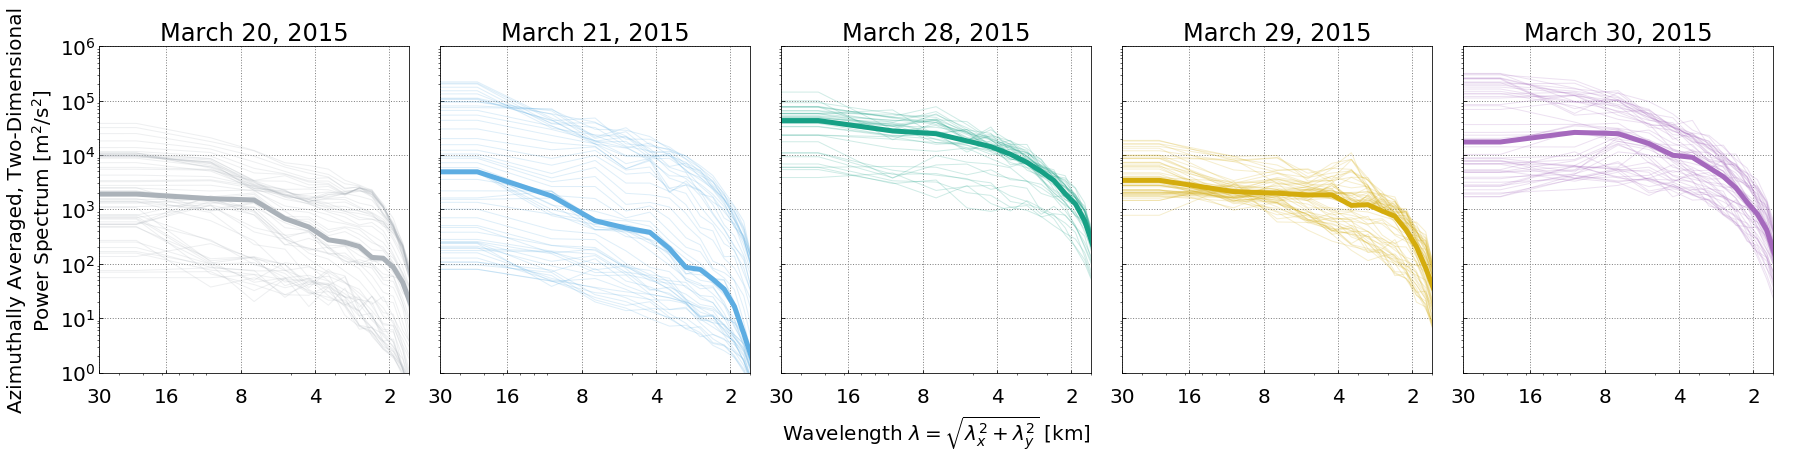

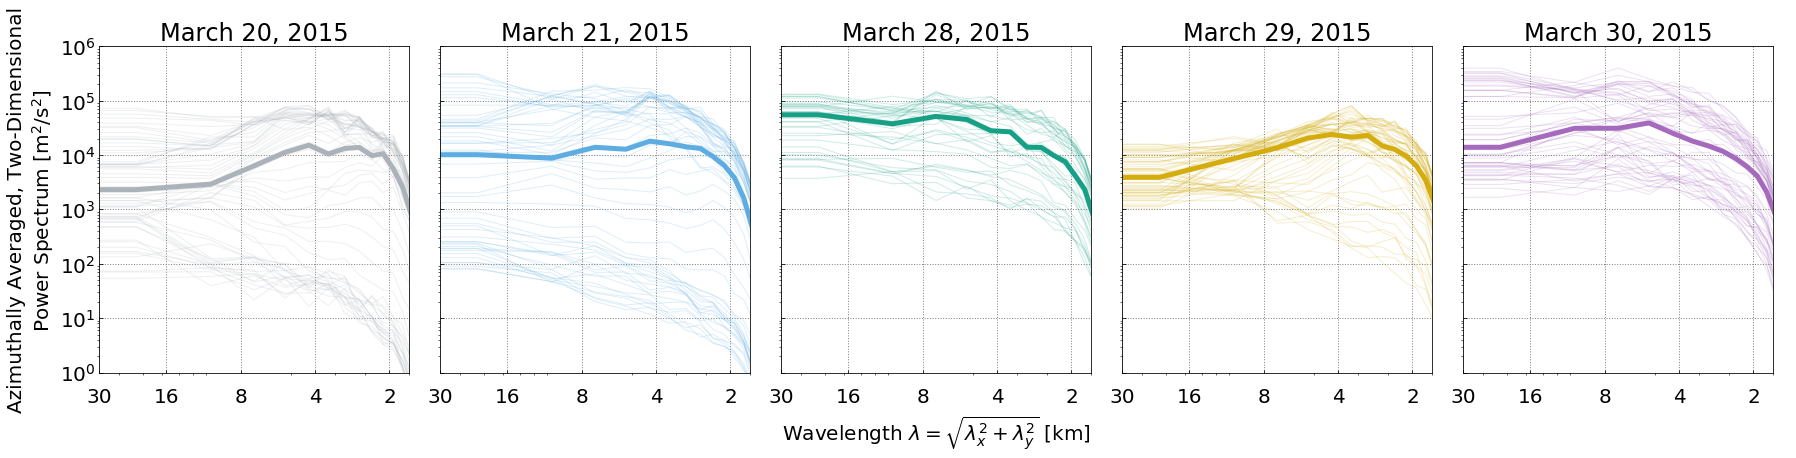

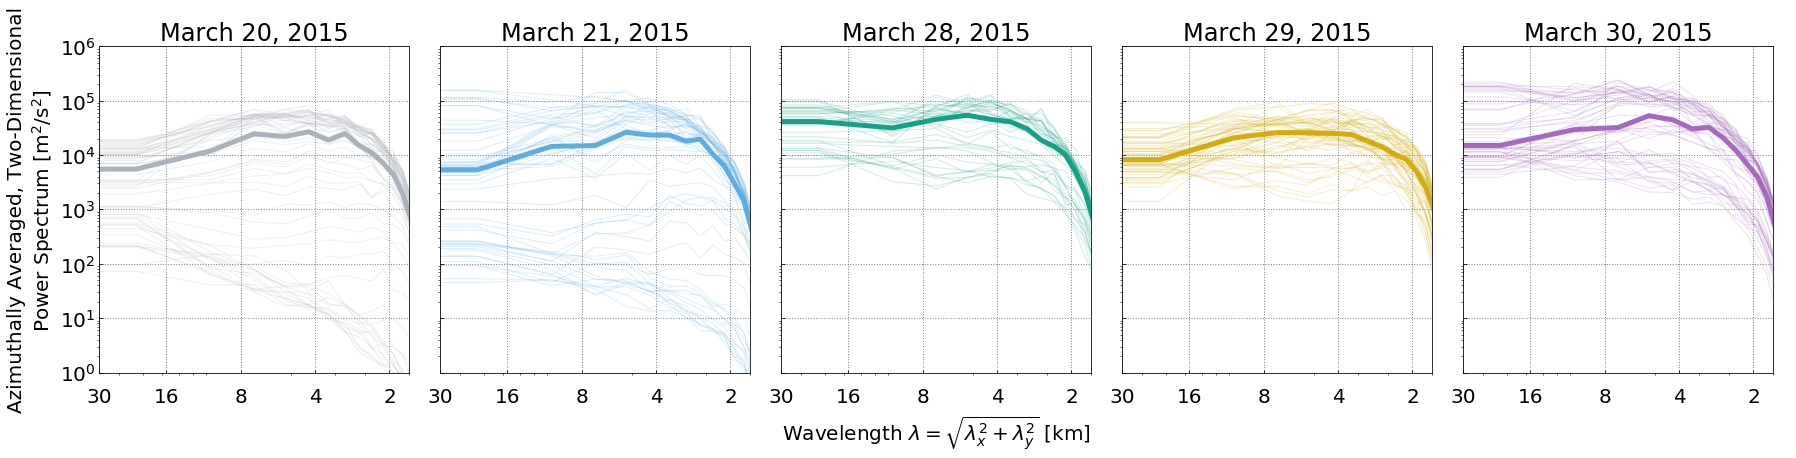

In [217]:
plotscale = 'loglog'

days  = subsets_by_day_les.keys()
ndays = len(days)
sims  = ["les","mynn","ysu","sh","vles"]

for sim in sims:

    link_snapshots = subsets_by_day_les if sim.lower() in ["les","les_raw"] else subsets_by_day_gz
    link_daily_avgs = dayavg_by_day_les if sim.lower() in ["les","les_raw"] else dayavg_by_day_gz
    
    fig = plt.figure(figsize=(6*ndays,6))
    
    axbig = fig.add_subplot(111)
    axbig.spines['top'].set_color('none')
    axbig.spines['bottom'].set_color('none')
    axbig.spines['left'].set_color('none')
    axbig.spines['right'].set_color('none')
    axbig.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    if varname=="w":
        axbig.set_ylabel("Azimuthally Averaged, Two-Dimensional\nPower Spectrum [m$^2$/s$^2$]")
    else:
        axbig.set_ylabel("Azimuthally Averaged, Two-Dimensional\nPower Co-Spectrum [m$^2$/s$^2$]")        
    axbig.set_xlabel("Wavelength $\lambda=\sqrt{\lambda_x^2+\lambda_y^2}$ [km]", labelpad=15)
    #axbig.set_title("$z/z_i={0}$".format(z_zi_target)+"   --   Simulation: {0}".format(sim.upper())+"   --   Variable: {0}".format(varname),y=1.15)
    
    axs = {}

    for iax,day in enumerate(days):
        
        axs[iax] = fig.add_subplot(1,ndays,iax+1)
        axs[iax].grid(color='gray', linestyle=':', linewidth=1)
                
        df_subset = link_snapshots[day].copy()    
        for datetime in np.unique(df_subset.index.get_level_values(0)):
            snapshot = df_subset.xs(datetime,level=0)
            axs[iax].loglog(snapshot.index, snapshot[sim].values, lw=1, color=colors_days[day],alpha=0.2)    
        df_subset_timeavg = link_daily_avgs[day].copy()
        
        if plotscale=='loglog':
            axs[iax].loglog(df_subset_timeavg.index, df_subset_timeavg[sim],lw=5,color=colors_days[day])
        elif plotscale=='semilogx':
            axs[iax].semilogx(df_subset_timeavg.index, df_subset_timeavg[sim],lw=5,color=colors_days[day])
        elif plotscale=='semilogy':
            axs[iax].semilogy(df_subset_timeavg.index, df_subset_timeavg[sim],lw=5,color=colors_days[day])
        else:
            axs[iax].plot(df_subset_timeavg.index, df_subset_timeavg[sim],lw=5,color=colors_days[day])
            
        if iax>0:
            plt.setp(axs[iax].get_yticklabels(), visible=False)
        
        axs[iax].xaxis.set_tick_params(direction='in')
        axs[iax].yaxis.set_tick_params(direction='in')          
        
        axs[iax].set_xlim([minf,filterf])
        axs[iax].set_ylim([1e0,1e6])
        axs[iax].set_xticks(xticks_example)
        axs[iax].set_xticklabels(xlabels_example)
        axs[iax].set_title('March {0}, 2015'.format(day))
        axs[iax].tick_params(axis='x', which='major', pad=15)

    fig.subplots_adjust(wspace=0.1)         
    fig.savefig("../figs/{0}_spectra_daily_panels_{1}_{2}.png".format(varname,sim,plotscale), dpi=300, bbox_inches="tight")

### one figure per day, with all simulation strategies

In [41]:
meters = [2000,4000,8000,16000,30000]
xticks_example  = [1/a for a in meters]
xlabels_example = ["{0}".format(int(a/1000)) for a in meters ]

In [42]:
fs=20
plt.rc("font",size=fs)

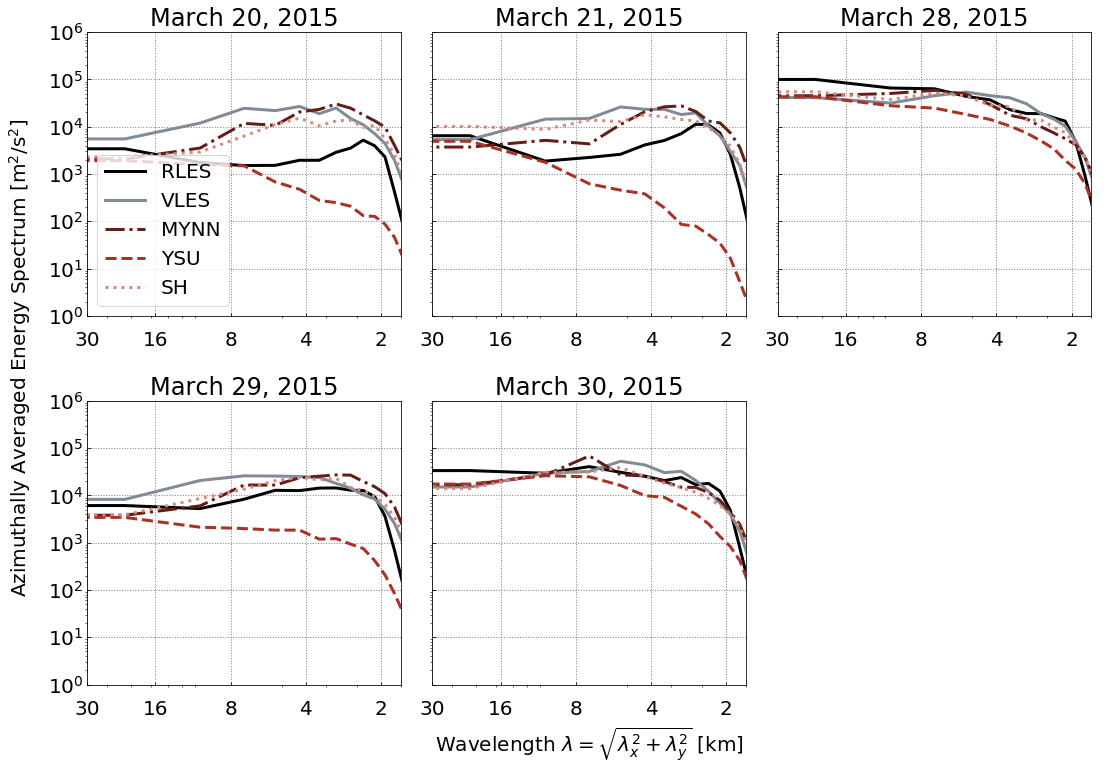

In [51]:
days  = subsets_by_day_les.keys()
ndays = len(days)
nsims = ["les","mynn","ysu","sh","vles"]

fig = plt.figure(figsize=(6*3,6*2))

axbig = fig.add_subplot(111)
axbig.spines['top'].set_color('none')
axbig.spines['bottom'].set_color('none')
axbig.spines['left'].set_color('none')
axbig.spines['right'].set_color('none')
axbig.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
if varname=="w":
    axbig.set_ylabel("Azimuthally Averaged Energy Spectrum [m$^2$/s$^2$]", labelpad=15)
else:
    axbig.set_ylabel("Azimuthally Averaged Energy Co-Spectrum [m$^2$/s$^2$]", labelpad=15)
axbig.set_xlabel("Wavelength $\lambda=\sqrt{\lambda_x^2+\lambda_y^2}$ [km]", labelpad=15)

#axbig.set_title("$z/z_i={0}$".format(z_zi_target)+"   --   Variable: {0}".format(varname),y=1.15)

axs = {}

for iax,day in enumerate(days):

    if iax==3:
        axs[iax] = fig.add_subplot(2,3,iax+1,position=[50,0,10,10])
    else:
        axs[iax] = fig.add_subplot(2,3,iax+1)
    axs[iax].grid(color='gray', linestyle=':', linewidth=1)
    
    
    for sim in keys_in_order:
        
        link_snapshots = subsets_by_day_les if sim.lower() in ["les","les_raw"] else subsets_by_day_gz
        link_daily_avgs = dayavg_by_day_les if sim.lower() in ["les","les_raw"] else dayavg_by_day_gz        
        
        df_subset_timeavg = link_daily_avgs[day].copy()        
        simlab="RLES" if sim=="les" else sim        
        axs[iax].loglog(df_subset_timeavg.index, df_subset_timeavg[sim],lw=3,color=colors[sim],label=simlab.upper(),ls=lss[sim])
        
        #idx_start = np.where(frequencies>1/8000)[0][0]
        #axs[iax].axvline(x=df_subset_timeavg.index[idx_start], color='limegreen', lw=5)
        
        
    if iax not in [0,3]:
        plt.setp(axs[iax].get_yticklabels(), visible=False)

    axs[iax].xaxis.set_tick_params(direction='in')
    axs[iax].yaxis.set_tick_params(direction='in')          

    if iax == 0:
        plt.legend(loc=3,ncol=1)

    axs[iax].set_xlim([minf,filterf])
    axs[iax].set_ylim([1e0,1e6])
    axs[iax].set_xticks(xticks_example)
    axs[iax].set_xticklabels(xlabels_example)
    axs[iax].set_title('March {0}, 2015'.format(day))
    axs[iax].tick_params(axis='x', which='major', pad=15)

fig.subplots_adjust(wspace=0.1,hspace=0.3) 
fig.savefig("../figs/{0}_spectra_daily_panels_all_sims_mean.png".format(varname), dpi=300, bbox_inches="tight")

## Quantify error in spectra

In [22]:
import seaborn.apionly as sea

/Users/pdoubraw/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/pdoubraw/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/pdoubraw/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/pdoubraw/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/pdoubraw/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDepre

In [20]:
fs=15
plt.rc("font",size=fs)

#### Compute areas

In [18]:
meters_start = 8000

sims = ["les","mynn","ysu","sh","vles"]
areas_snapshots = pd.DataFrame(index=convective_list, columns=sims)
for datetime in convective_list:
    timestamp = pd.Timestamp(datetime)
    for sim in sims:
        df_to_use = df_les_convective if sim.lower() in ["les","les_raw"] else df_gz_convective
        df = df_to_use.xs(timestamp,level=0) 
        df = df[sim].copy()
        
        frequencies = df.index
        idx_start   = np.where(frequencies>1/meters_start)[0][0]
        frequencies = frequencies[idx_start:]
        powers      = df.values[idx_start:]  
        area = np.trapz(powers,frequencies)        
        areas_snapshots.loc[timestamp,sim] = area

#### Compute differences

In [23]:
percent_difference_in_area_under_psd_at_highfreqs = (areas_snapshots.divide(areas_snapshots['les'].values, axis=0)*100 - 100)
percent_off = percent_difference_in_area_under_psd_at_highfreqs

#### Get values for KDE using seaborn

In [45]:
bins = {}
vals = {}
for sim in sims:
    xx,yy=sea.distplot(percent_off[sim].values, bins=np.arange(0,1000,20)).get_lines()[0].get_data()
    bins[sim] = xx.copy()
    vals[sim] = yy.copy()    
    plt.clf()

<Figure size 432x288 with 0 Axes>

#### plot

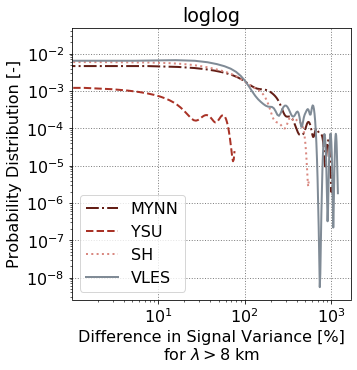

In [49]:
fig = plt.figure(figsize=(5,5))
ax  = fig.add_subplot(111)
ax.grid(color='gray', linestyle=':', lw=1)
for sim in sims:
    ax.loglog(bins[sim], vals[sim], label=sim.upper(), color=colors[sim], lw= 2, ls=lss[sim])
ax.legend()
# ax.set_ylim([0,0.03])
# ax.set_yticks(np.arange(0,0.03001,0.01))
# ax.set_xticks([-100,0,100,200,300,400,500])
# # ax.set_xlim([-150,500])

ax.set_xlabel("Difference in Signal Variance [%]\nfor $\lambda>8$ km")
ax.set_ylabel("Probability Distribution [-]")
ax.set_title("loglog")
fig.savefig("../figs/loglog.png", dpi=200, bbox_inches="tight")

Text(0, 0.5, 'Probability Distribution [-]')

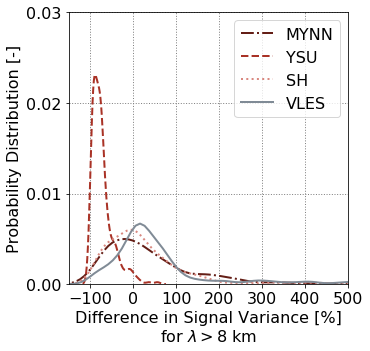

In [34]:
fig = plt.figure(figsize=(5,5))
ax  = fig.add_subplot(111)
ax.grid(color='gray', linestyle=':', lw=1)
for sim in sims:
    ax.plot(bins[sim], vals[sim], label=sim.upper(), color=colors[sim], lw= 2, ls=lss[sim])
ax.legend()
ax.set_ylim([0,0.03])
ax.set_yticks(np.arange(0,0.03001,0.01))
ax.set_xticks([-100,0,100,200,300,400,500])
ax.set_xlim([-150,500])

ax.set_xlabel("Difference in Signal Variance [%]\nfor $\lambda>8$ km")
ax.set_ylabel("Probability Distribution [-]")
# fig.savefig("../figs/difference_in_instantaneous_spectra_{0}.png".format(varname), dpi=200, bbox_inches="tight")

# hourly means

In [61]:
days = np.unique(df_les.index.get_level_values(0).day)

In [88]:
hourly_medians  = {}

for day in days:
    
    print(day)

    day1  = day
    day2  = day

    hour1 = 14
    hour2 = 23

    minute1 = 0
    minute2 = 59

    start = pd.Timestamp(year=year,month=month,day=day1,hour=hour1,minute=minute1)
    end   = pd.Timestamp(year=year,month=month,day=day2,hour=hour2,minute=minute2)

    df_subset           = df_all.reset_index().set_index('datetime').loc[start:end].reset_index().set_index(['datetime','index'])
    hourly_medians[day] = df_subset.unstack().resample('1h', level=0).median().stack()

20
21
28
29
30


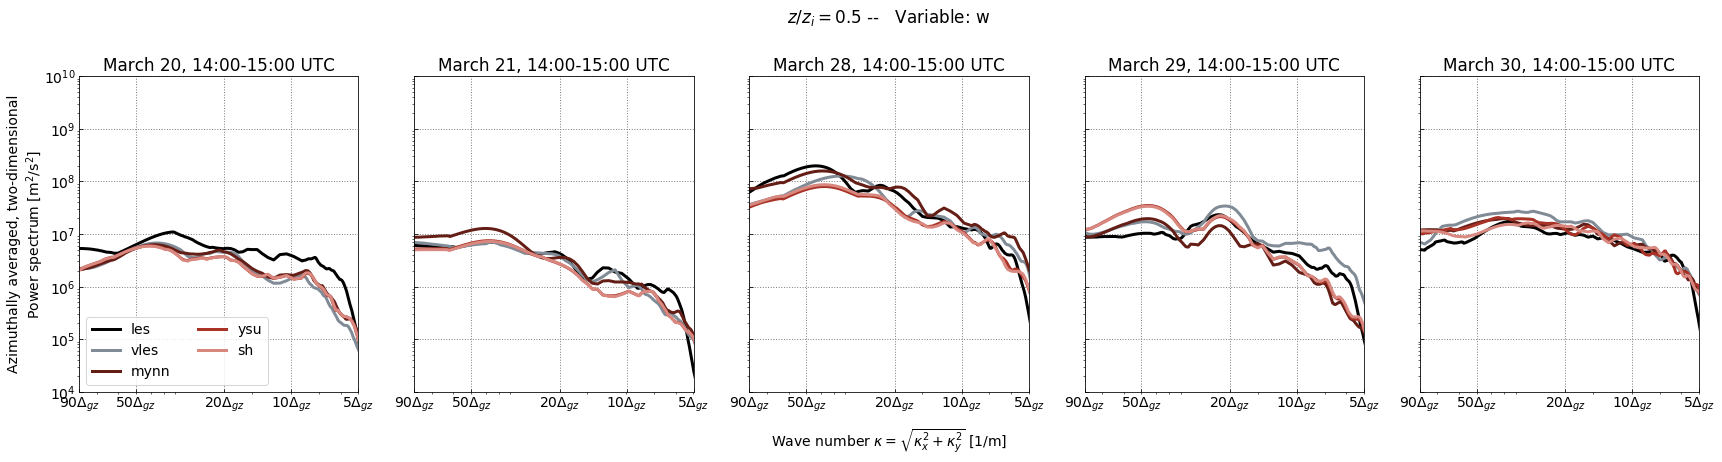

In [150]:
days  = hourly_medians.keys()
ndays = len(days)
nsims = len(keys_in_order)

lines = {}
hour  = 14


fig = plt.figure(figsize=(6*ndays,6))

axbig = fig.add_subplot(111)
axbig.spines['top'].set_color('none')
axbig.spines['bottom'].set_color('none')
axbig.spines['left'].set_color('none')
axbig.spines['right'].set_color('none')
axbig.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
axbig.set_ylabel("Azimuthally averaged, two-dimensional\nPower spectrum [m$^2$/s$^2$]")    
axbig.set_xlabel("Wave number $\kappa=\sqrt{\kappa_x^2+\kappa_y^2}$ [1/m]",labelpad=15)    
axbig.set_title("$z/z_i={0}$".format(z_zi_target)+" --   Variable: {0}".format(varname),y=1.15)

axs = {}

for iax,day in enumerate(days):
    
    lines[iax] = {}

    axs[iax] = fig.add_subplot(1,ndays,iax+1)
    axs[iax].grid(color='gray', linestyle=':', linewidth=1)

    df = hourly_medians[day].xs(pd.Timestamp(2015,3,day,hour),level=0)        

    for sim in keys_in_order:
        lines[iax][sim] = axs[iax].loglog(df.index, df[sim].values,color=colors[sim],label=sim,lw=3,alpha=1)[0]

    if iax>0:
        plt.setp(axs[iax].get_yticklabels(), visible=False)

    axs[iax].xaxis.set_tick_params(direction='in')
    axs[iax].yaxis.set_tick_params(direction='in')          

    if iax == 0:
        plt.legend(loc=3,ncol=2)

    axs[iax].set_xlim([minf,filterf])
    axs[iax].set_ylim([1e4,1e10])
    axs[iax].set_xlim([minf,filterf])
    axs[iax].set_xticks(xticks)
    axs[iax].set_xticklabels(xlabels)
    axs[iax].set_title('March {0}, {1}:00-{2}:00 UTC'.format(day,hour,hour+1))
    
fig.subplots_adjust(bottom=0.15, left=0.15)    

    # # fig.savefig("../figs/w_spectra_daily_panels_all_sims_mean.png", dpi=200, bbox_inches="tight")

In [151]:
def animate(hour):

    axbig.set_title("$z/z_i={0}$".format(z_zi_target)+" -- Hour : {0} UTC".format(hour)+"  --   Variable: {0}".format(varname),y=1.15)    
    
    for iax,day in enumerate(days):    
        try:
            df = hourly_medians[day].xs(pd.Timestamp(2015,3,day,hour),level=0)        
            for sim in keys_in_order:
                lines[iax][sim].set_data(df.index, df[sim].values)
        except:
            for sim in keys_in_order:
                lines[iax][sim].set_data([],[])
        axs[iax].set_title('March {0}, {1}:00-{2}:00 UTC'.format(day,hour,hour+1))

In [152]:
anim = FuncAnimation(fig, animate, interval=400, frames=np.arange(14,24,1))

In [153]:
# anim

In [154]:
anim.save("../figs/hourly_mean_spectra.mp4")

### video of snapshots

In [13]:
hm = []
for hour in hours:
    for minute in minutes:
        hm.append((hour,minute))

In [ ]:
df_gz

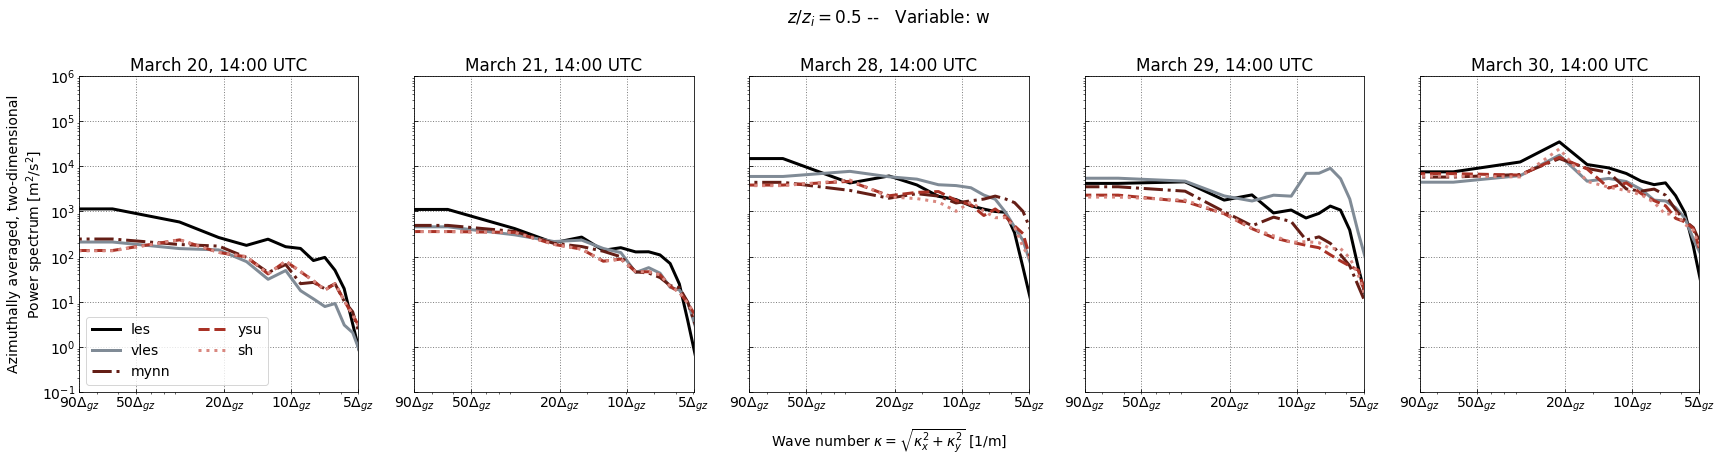

In [35]:
days  = [20,21,28,29,30] 
ndays = len(days)
sims  = ['les', 'vles', 'mynn', 'ysu', 'sh']
nsims = len(sims)

lines = {}

i            = 0
yesdata      = False
hour, minute = hm[i]

fig = plt.figure(figsize=(6*ndays,6))

axbig = fig.add_subplot(111)
axbig.spines['top'].set_color('none')
axbig.spines['bottom'].set_color('none')
axbig.spines['left'].set_color('none')
axbig.spines['right'].set_color('none')
axbig.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
axbig.set_ylabel("Azimuthally averaged, two-dimensional\nPower spectrum [m$^2$/s$^2$]")    
axbig.set_xlabel("Wave number $\kappa=\sqrt{\kappa_x^2+\kappa_y^2}$ [1/m]",labelpad=15)    
axbig.set_title("$z/z_i={0}$".format(z_zi_target)+" --   Variable: {0}".format(varname),y=1.15)

axs = {}

for iax,day in enumerate(days):
    
    lines[iax] = {}

    axs[iax] = fig.add_subplot(1,ndays,iax+1)
    axs[iax].grid(color='gray', linestyle=':', linewidth=1)

    timestamp = pd.Timestamp(2015,3,day,hour,minute)    

    for sim in sims:    
        
        label = sim if iax==0 else None
        df_to_use = df_les if sim.lower() in ["les","les_raw"] else df_gz
        
        try:
            df = df_to_use.xs(timestamp,level=0)     
            xx = df.index
            yy = df[sim].values        
            yesdata = True
        except:
            xx = []
            yy = []
            yesdata = False

        lines[iax][sim] = axs[iax].loglog(xx, yy, color=colors[sim],label=sim,lw=3,marker='None',alpha=1,ls=lss[sim])[0]            

    if iax>0:
        plt.setp(axs[iax].get_yticklabels(), visible=False)

    axs[iax].xaxis.set_tick_params(direction='in')
    axs[iax].yaxis.set_tick_params(direction='in')          

    if iax == 0:
        plt.legend(loc=3,ncol=2)

    axs[iax].set_xlim([minf,filterf])
    axs[iax].set_ylim([1e-1,1e6])
    axs[iax].set_xticks(xticks)
    axs[iax].set_xticklabels(xlabels)
    axs[iax].set_title('March {0}, {1:%H:%M} UTC'.format(day,timestamp))
    
fig.subplots_adjust(bottom=0.15, left=0.15)    

In [36]:
def animate(i):

    hour, minute = hm[i]
    
    for iax,day in enumerate(days): 
       
        timestamp = pd.Timestamp(2015,3,day,hour,minute)    
        
        for sim in sims:    

            label = sim if iax==0 else None
            df_to_use = df_les if sim.lower() in ["les","les_raw"] else df_gz

            try:
                df = df_to_use.xs(timestamp,level=0)     
                xx = df.index
                yy = df[sim].values        
                yesdata = True
            except:
                xx = []
                yy = []
                yesdata = False

            lines[iax][sim].set_data(xx,yy)
        
        axs[iax].set_title('March {0}, {1:%H:%M} UTC'.format(day,timestamp))

In [39]:
anim = FuncAnimation(fig, animate, interval=600, frames=range(60))

In [40]:
# anim

In [41]:
anim.save("../figs/snapshots_spectra_z_zi_0.5.mp4")